In [1]:
import drishtypy.utils.get_cuda as cuda
device = cuda.get_device()

cuda available
Device set to :  cuda:0


In [2]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

SEED = 1
batch_size=512

In [3]:
import os 
path = os.getcwd()
path  = path + '/dataset/'
print(path)

/home/abhinav/Drishtypy/dataset/


In [4]:
import drishtypy.data.returns_dataloader as dl
trainset, testset, train_loader, test_loader = dl.get_dataloader(batch_size=batch_size, num_workers=4, cuda = True,path = path)

['/home/abhinav/Drishtypy', '/home/abhinav/anaconda3/lib/python38.zip', '/home/abhinav/anaconda3/lib/python3.8', '/home/abhinav/anaconda3/lib/python3.8/lib-dynload', '', '/home/abhinav/.local/lib/python3.8/site-packages', '/home/abhinav/anaconda3/lib/python3.8/site-packages', '/home/abhinav/anaconda3/lib/python3.8/site-packages/IPython/extensions', '/home/abhinav/.ipython', '/home/abhinav/Drishtypy']
Running over Cuda !!  True
Files already downloaded and verified
Files already downloaded and verified
mean 0.49186864
standard dev 0.24697131
mean 0.48265335
standard dev 0.24338901
mean 0.44717798
standard dev 0.26159254
Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

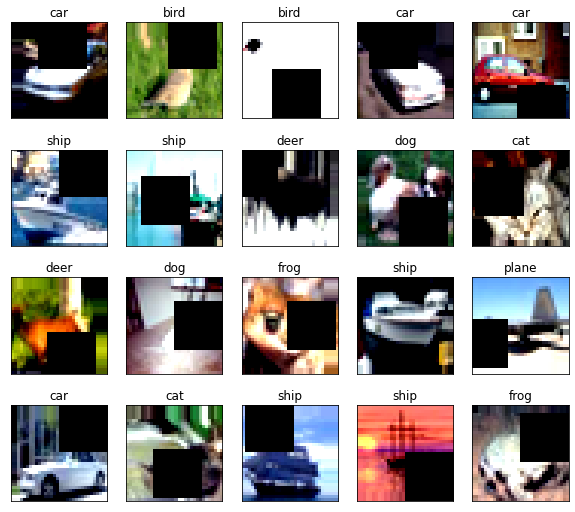

In [5]:
import drishtypy.viz.do_plots as plt
plt.plot_dataset_images(device, classes, train_loader)

In [6]:
import drishtypy.models.resnet_S11 as mod
model = mod.ResNet_11()




In [7]:
from drishtypy.learner.learner import model_summary
model_summary(model, device, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1, 256,

In [8]:
# from drishtypy.utils.graphic_summary import graphical_summary
# graphical_summary(model)


In [9]:
from tqdm import tqdm
from drishtypy.learner.learner import build_model

Stopping early, the loss has diverged

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 2.61E-01


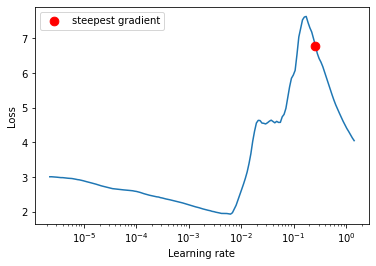

Using Learning Rate :  0.006294988990221889


In [10]:
import torch.optim as optim
import torch.nn as nn
from torch_lr_finder import LRFinder
optimizer = optim.SGD(model.parameters(), lr=0.000001, momentum=0.95, nesterov=True)
criterion = nn.CrossEntropyLoss()
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(train_loader, end_lr=10, num_iter=200, step_mode="exp")
lr_finder.plot()
loss = lr_finder.history['loss']
lr = lr_finder.history['lr']
    
lr = lr[loss.index(min(loss))]
print('Using Learning Rate : ', lr)
lr_finder.reset()

In [11]:
import torch.nn as nn
from drishtypy.utils.LR_Test import lr_test
max_lr = 0.08
min_lr = 0.00001

print('Max LR :{} and MIN LR : {}'.format(max_lr,min_lr))
epoch = 15


Max LR :0.08 and MIN LR : 1e-05


epoch = 1 Lr = 1e-05  Loss=2.3645083904266357 Batch_id=97 Accuracy=9.94: 100%|██████████| 98/98 [00:19<00:00,  5.15it/s]
epoch = 2 Lr = 0.0040095  Loss=1.3843804597854614 Batch_id=97 Accuracy=37.84: 100%|██████████| 98/98 [00:18<00:00,  5.20it/s]
epoch = 3 Lr = 0.008009  Loss=1.6399255990982056 Batch_id=97 Accuracy=29.52: 100%|██████████| 98/98 [00:18<00:00,  5.18it/s]
epoch = 4 Lr = 0.012008500000000002  Loss=2.1031739711761475 Batch_id=97 Accuracy=17.49: 100%|██████████| 98/98 [00:19<00:00,  5.14it/s]
epoch = 5 Lr = 0.016008  Loss=2.3318240642547607 Batch_id=97 Accuracy=16.93: 100%|██████████| 98/98 [00:18<00:00,  5.18it/s]
epoch = 6 Lr = 0.0200075  Loss=2.2557687759399414 Batch_id=97 Accuracy=16.95: 100%|██████████| 98/98 [00:19<00:00,  5.10it/s]
epoch = 7 Lr = 0.024007  Loss=2.3671398162841797 Batch_id=97 Accuracy=12.84: 100%|██████████| 98/98 [00:19<00:00,  5.06it/s]
epoch = 8 Lr = 0.0280065  Loss=2.2303287982940674 Batch_id=97 Accuracy=12.99: 100%|██████████| 98/98 [00:19<00:00, 

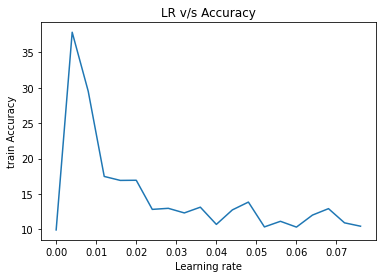

In [12]:
lr_test(max_lr, min_lr,device,epoch,model,criterion,train_loader,momemtum = 0.9,weight_decay=0.0005, plot= True)

 ## Scheduling rules used
epochs = epochs

steps_per_epoch = len(trainloader)

total_steps = steps_per_epoch * epochs

pct_start = 5/epochs


    scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer,
                                                    max_lr = lr,
                                                    total_steps=None,
                                                    epochs=epochs,
                                                    steps_per_epoch=len(trainloader),
                                                    pct_start=pct_start,
                                                    anneal_strategy='linear',
                                                    div_factor=10,
                                                    final_div_factor = 1)

In [13]:
# build and train the model
model_name = "Resnet11"
EPOCHS = 24
model =  model.to(device) # use GPU

# using L1 and L2 regularization
train_acc, train_losses, test_acc, test_losses = build_model(model, 
                                                            device, 
                                                            trainloader=train_loader, 
                                                            testloader=test_loader, 
                                                            epochs=EPOCHS,
                                                            L1_loss_flag=False,
                                                            L2_penalty_val=0.005,
                                                            lr = 0.04)

  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.924133 Batch_id=97 Accuracy=36.07: 100%|██████████| 98/98 [00:17<00:00,  5.47it/s]

LR: [0.011214723926380368]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.409015, Accuracy: 4948/10000 (49.48%)

EPOCH: 1


Loss=1.325936 Batch_id=97 Accuracy=53.11: 100%|██████████| 98/98 [00:18<00:00,  5.34it/s]

LR: [0.01842944785276074]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.255357, Accuracy: 5614/10000 (56.14%)

EPOCH: 2


Loss=1.129464 Batch_id=97 Accuracy=60.99: 100%|██████████| 98/98 [00:18<00:00,  5.42it/s]

LR: [0.025644171779141106]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.005039, Accuracy: 6505/10000 (65.05%)

EPOCH: 3


Loss=0.945205 Batch_id=97 Accuracy=67.24: 100%|██████████| 98/98 [00:18<00:00,  5.38it/s]

LR: [0.032858895705521474]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.882336, Accuracy: 6888/10000 (68.88%)

EPOCH: 4


Loss=0.823625 Batch_id=97 Accuracy=71.37: 100%|██████████| 98/98 [00:18<00:00,  5.24it/s]

LR: [0.039980665950590764]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.709736, Accuracy: 7562/10000 (75.62%)

EPOCH: 5


Loss=0.713507 Batch_id=97 Accuracy=75.09: 100%|██████████| 98/98 [00:18<00:00,  5.21it/s]

LR: [0.0380859291084855]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.717840, Accuracy: 7542/10000 (75.42%)

EPOCH: 6


Loss=0.626101 Batch_id=97 Accuracy=77.87: 100%|██████████| 98/98 [00:18<00:00,  5.29it/s]

LR: [0.036191192266380234]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.594589, Accuracy: 7983/10000 (79.83%)

EPOCH: 7


Loss=0.571173 Batch_id=97 Accuracy=80.00: 100%|██████████| 98/98 [00:18<00:00,  5.30it/s]

LR: [0.03429645542427497]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.557784, Accuracy: 8107/10000 (81.07%)

EPOCH: 8


Loss=0.525393 Batch_id=97 Accuracy=81.69: 100%|██████████| 98/98 [00:18<00:00,  5.32it/s]

LR: [0.03240171858216971]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.652759, Accuracy: 7886/10000 (78.86%)

EPOCH: 9


Loss=0.490888 Batch_id=97 Accuracy=83.12: 100%|██████████| 98/98 [00:18<00:00,  5.32it/s]

LR: [0.030506981740064446]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.511814, Accuracy: 8236/10000 (82.36%)

EPOCH: 10


Loss=0.458816 Batch_id=97 Accuracy=84.07: 100%|██████████| 98/98 [00:18<00:00,  5.31it/s]

LR: [0.02861224489795918]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.507440, Accuracy: 8294/10000 (82.94%)

EPOCH: 11


Loss=0.432782 Batch_id=97 Accuracy=85.13: 100%|██████████| 98/98 [00:19<00:00,  5.14it/s]

LR: [0.02671750805585392]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.527810, Accuracy: 8212/10000 (82.12%)

EPOCH: 12


Loss=0.404624 Batch_id=97 Accuracy=86.08: 100%|██████████| 98/98 [00:18<00:00,  5.21it/s]

LR: [0.024822771213748658]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.493716, Accuracy: 8368/10000 (83.68%)

EPOCH: 13


Loss=0.390004 Batch_id=97 Accuracy=86.71: 100%|██████████| 98/98 [00:18<00:00,  5.29it/s]

LR: [0.022928034371643393]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.464838, Accuracy: 8439/10000 (84.39%)

EPOCH: 14


Loss=0.377765 Batch_id=97 Accuracy=87.09: 100%|██████████| 98/98 [00:18<00:00,  5.25it/s]

LR: [0.021033297529538128]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.424987, Accuracy: 8535/10000 (85.35%)

EPOCH: 15


Loss=0.366326 Batch_id=97 Accuracy=87.39: 100%|██████████| 98/98 [00:19<00:00,  5.15it/s]

LR: [0.019138560687432866]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.443148, Accuracy: 8493/10000 (84.93%)

EPOCH: 16


Loss=0.347126 Batch_id=97 Accuracy=88.11: 100%|██████████| 98/98 [00:18<00:00,  5.16it/s]

LR: [0.0172438238453276]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.381522, Accuracy: 8688/10000 (86.88%)

EPOCH: 17


Loss=0.327368 Batch_id=97 Accuracy=88.87: 100%|██████████| 98/98 [00:19<00:00,  5.06it/s]

LR: [0.015349087003222336]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.466851, Accuracy: 8472/10000 (84.72%)

EPOCH: 18


Loss=0.312823 Batch_id=97 Accuracy=89.28: 100%|██████████| 98/98 [00:19<00:00,  5.14it/s]

LR: [0.013454350161117075]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.367422, Accuracy: 8770/10000 (87.70%)

EPOCH: 19


Loss=0.302933 Batch_id=97 Accuracy=89.63: 100%|██████████| 98/98 [00:19<00:00,  5.11it/s]

LR: [0.01155961331901181]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.354928, Accuracy: 8810/10000 (88.10%)

EPOCH: 20


Loss=0.286770 Batch_id=97 Accuracy=90.31: 100%|██████████| 98/98 [00:19<00:00,  5.11it/s]

LR: [0.009664876476906548]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.359262, Accuracy: 8764/10000 (87.64%)

EPOCH: 21


Loss=0.267377 Batch_id=97 Accuracy=90.88: 100%|██████████| 98/98 [00:18<00:00,  5.17it/s]

LR: [0.007770139634801283]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.322877, Accuracy: 8915/10000 (89.15%)

EPOCH: 22


Loss=0.245233 Batch_id=97 Accuracy=91.70: 100%|██████████| 98/98 [00:18<00:00,  5.16it/s]

LR: [0.005875402792696022]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.304251, Accuracy: 8991/10000 (89.91%)

EPOCH: 23


Loss=0.209993 Batch_id=97 Accuracy=93.05: 100%|██████████| 98/98 [00:19<00:00,  5.05it/s]

LR: [0.00398066595059076]



Test set: Average loss: 0.280887, Accuracy: 9040/10000 (90.40%)



In [14]:
from drishtypy.learner.learner import get_test_accuracy,class_based_accuracy
get_test_accuracy(model, device, test_loader)
class_based_accuracy(model, device, classes, test_loader)


Accuracy of the network on the 10000 test images: 90.40%

Accuracy of plane : 100 %
Accuracy of   car : 100 %
Accuracy of  bird : 80 %
Accuracy of   cat : 80 %
Accuracy of  deer : 83 %
Accuracy of   dog : 66 %
Accuracy of  frog : 100 %
Accuracy of horse : 100 %
Accuracy of  ship : 100 %
Accuracy of truck : 100 %



Ploting Accuracy and Loss history: Resnet11



/home/abhinav/Drishtypy/drishtypy/viz/do_plots.py:27: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[0].set_xticks(np.arange(1, x_size + 1), x_size / 10)
/home/abhinav/Drishtypy/drishtypy/viz/do_plots.py:38: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[1].set_xticks(np.arange(1, x_size + 1), x_size / 10)


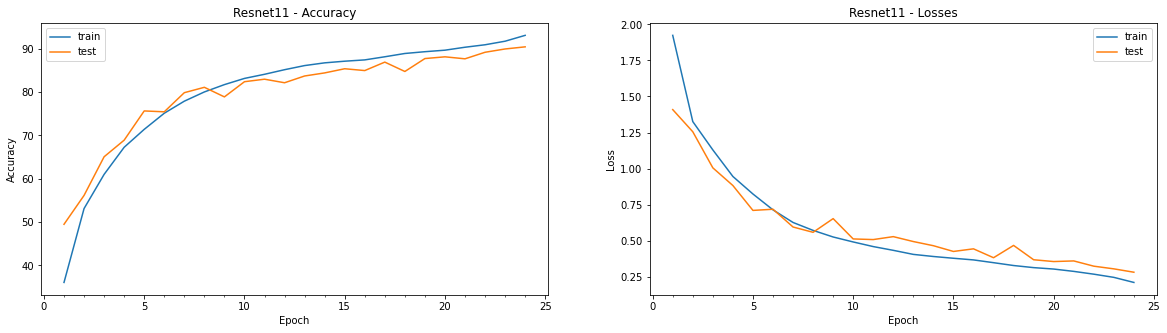

In [15]:
from drishtypy.viz.do_plots import  plot_model_history
print("\nPloting Accuracy and Loss history: {}\n".format(model_name))
plot_model_history(model_name, 
                   train_acc,test_acc,
                   train_losses,test_losses,
                   save_filename = "model_history")

In [16]:
# import gradcam.gradcam_abs as gradcamAbs1
import drishtypy.viz.gradcam.gradcam_abs as gradcamAbs1
from drishtypy.data.data_utils import find_stats
means,stds = find_stats(path)

/home/abhinav/Drishtypy
Files already downloaded and verified
Files already downloaded and verified
mean 0.49186864
standard dev 0.24697131
mean 0.48265335
standard dev 0.24338901
mean 0.44717798
standard dev 0.26159254


In [24]:
# path = os.getcwd() + '/Out'


PermissionError: [Errno 13] Permission denied: '../../Outputgradcam_result_details.png'

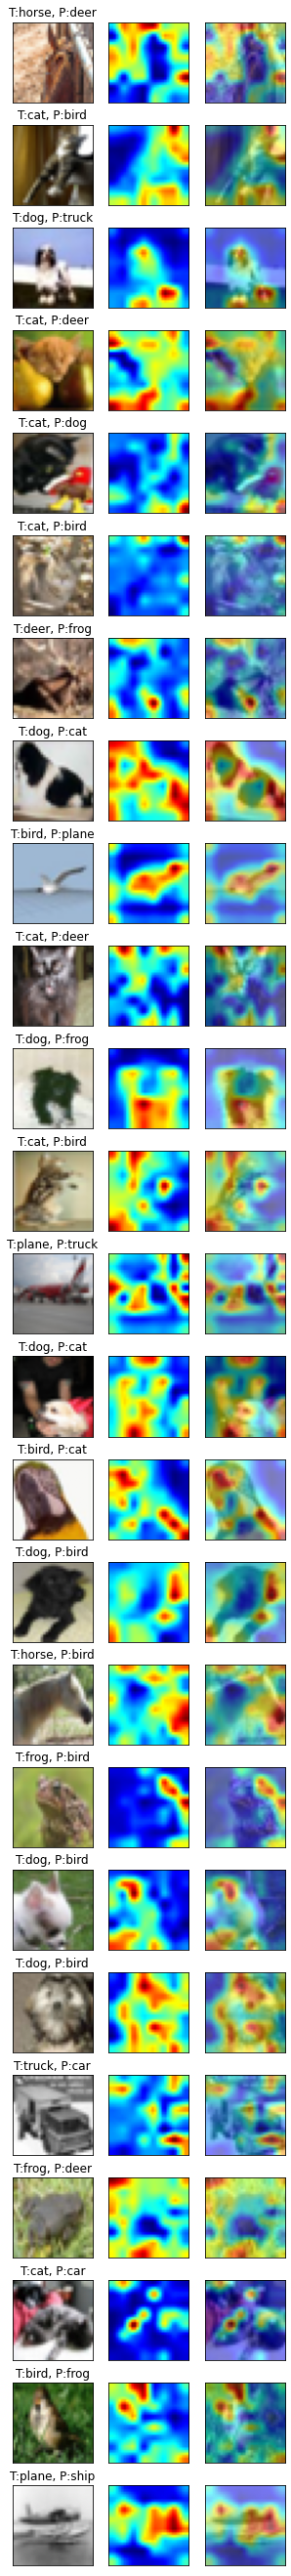

In [25]:
config = dict(model_type='resnet', arch=model, layer_name='layer2')
gcam = gradcamAbs1.GradCamAbs(device, config, means, stds)

gradcam_images, pred_results = gcam.applyOnMisclassifiedImages(dataloader=test_loader, num_of_images=25)

gcam.plot_results(gradcam_images, pred_results, classes, save_filename="gradcam_result_details")

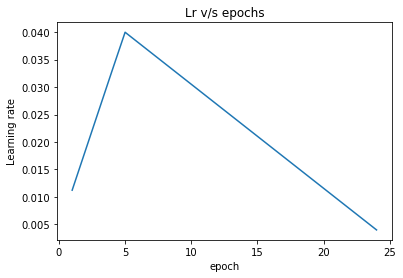

In [17]:
import matplotlib.pyplot as plt
from drishtypy.learner import learner
epochs = []
for i in range(24):
  epochs.append(i+1)

plt.plot(epochs,learner.LR)
plt.ylabel('Learning rate')
plt.xlabel("epoch")
plt.title("Lr v/s epochs")
plt.show()


#  scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer,
#                                                     max_lr = lr,
#                                                     total_steps=None,
#                                                     epochs=epochs,
#                                                     steps_per_epoch=len(trainloader),
#                                                     pct_start=pct_start,
#                                                     anneal_strategy='linear',
#                                                     div_factor=10,
#                                                     final_div_factor = 1)